Bu kısımda bir sınıfın içinde bulunan değişkenleri nasıl private değişkenler haline getirebleceğimiz ve bu değişkenlere dışarıdan nasıl erişebileceğimizi işleyeceğiz.

# Access Modifiers
Access Modifiers, türkçe erişim değiştiricileri bir sınıfın içindeki public değişkeni private hale getirmemize olanak sağlar. Python programlama dilinde bir sınıf içerisinde oluşturulan değişken default olarak public haldedir yani sınıf dışından da erişilebilir. Ancak eğer değişkenin başına iki alt çizgi koyarsanız artık bu değişken sınıf dışında erişilemez hale yani private hale gelir.


In [ ]:
class MyClass:
  def __init__(self, x, y):
    self.x = x
    self.__y = y
    
a1 = MyClass(3, 4)
print(a1.x)
print(a1.__y)

3


AttributeError: ignored

Yukarıda da görüldüğü gibi MyClass objesinde __y diye bir değişkenin olmadığına dair bir hata aldık. Aynı değişkenlere uyguladığımız gibi bu yöntemi sınıfın methodlarına da uygulayabiliriz.

In [ ]:
class MyClass:
  a = 5
  @classmethod
  def print(cls):
    print(cls.a)
  @classmethod
  def __print(cls):
    print(cls.a)

a1 = MyClass()
a1.print()
a1.__print()

5


AttributeError: ignored

Aynı haytayı burda da aldık görüldüğü gibi. Unutulmaması gereken şey bu gizliliğin sadece sınıf sışına olması. Sınıfın içinde istenildiği gibi bu değişkenler çağırılabilir.

Her ne kadar private değişkenler de olsalar her değişken sınıf dışına özel bir yazım şekli ile erişilebilir. Bu yazım şekli `objectName._className__privateProporty`. aşağıda görüldüğü gibi.

In [ ]:
class MyClass:
  a = 5
  __b = 3

  @classmethod
  def __print(cls):
    print(cls.a)

a1 = MyClass()
# ObjectName._ClassName.__PrivateProprty
print(a1._MyClass__b)
a1._MyClass__print()

3
5


Özetleyecek olursak gizli değişkenler ve methodlar bile aslında çok da gizli değiller. Zaten bir sınıfın içindeki her değişken bir noktada erişilebilir olmalı. Bir private değişkenin de değerinin değişmesi veya sınıf dışında kullanılması gerekbilir. Bunun için elbet yukarıda ki yöntrmi kullanabilirsiniz ama genel kanı farklı bir şey kullanmaktan yana.

# Encapsulation

Capsulation'dan kasıt private bir değişkenin public bir fonksiyon ile bağlanmasıdır. Bu sayede dışarıdan fonksiyon çağırılarak private değişken üzerinde tanımlanmış işlemler yapılabilir.

In [ ]:
class MyClass:
  def __init__(self):
    self.ID = 556
    self.__salary = 7000

  def get_salary(self):
    print(self.__salary)
  
  def set_salary(self, x):
    self.__salary = x

a1 = MyClass()
a1.get_salary()
a1.set_salary(8000)
a1.get_salary()
    

7000
8000


İşte bu yapılan işleme yani private bir değişkene bir method üzerinde erişilmesi işlemine Encapsuling işlemi denir. 

Bilinmesi gereken bir diğer şey ise encapsuling işleminde kullanılan methodlar 'Getters' ve 'Setters' diye ikiye ayrılır. Adlarından da anlaşılacağı gibi 'Getters' methodları private değişkenin değerini çekmeye yararken 'Setters' methodları private değişkene yeni değer atamak için kullanılır.

Yukarıdaki örnekte get_salary() bir Getter methodu iken set_salary bir Setter methodudur.

# Abstarct
Türkçesi soyutlama olan bu yöntem için ilk önce inheritance'nin biliniyor olması gerekmektedir. 

Soyutlama, uygulama ayrıntılarını gizleme ve yalnızca kullanıcıya işlevselliği gösterme bir sürecidir. Sadece kullanıcıya önemli şeyleri gösterir ve iç detayları gizlenir.

"Abstract" olarak nitelendirilen bir sınıf, soyut bir sınıf olarak adlandırılır. Somut methodların yanı sıra soyut methodlara da sahip olabilir. Normal sınıfın soyut methodlar olamaz. Bir bedeni olmayan bir yöntem, Soyut Metot olarak bilinir. Soyut methodlar sadece soyut sınıflarda beyan edilmelidir. Soyut method asla nihai olmayacaktır, bu yüzden soyut sınıftan oluşturulan sınıflar bu metodları oluşturmak zorundadır.

**Soyut Sınıflar Ne Zaman Kullanılır ?**
- Soyut yöntemler çoğunlukla iki veya daha fazla alt sınıfın farklı uygulamalarla aynı şeyi farklı şekillerde gerçekleştirdiği beyan edilir.
- Soyut sınıflar, genel davranış türlerini ve nesne yönelimli programlama sınıfı hiyerarşisini tanımlamaya yardımcı olur. Aynı zamanda soyut sınıfın uygulama detaylarını sunmak için alt sınıfları tanımlar.

ABC sınıfı Python abc modülünün bir sınıfıdır. Oluşturacağımız sınıfı ABC() ile genişletirsek(extend) ve bir soyutlama metodu dahil edersek, bu sınıftan miras alınan sınıfların bu soyutlama metodunu kullanması gerekecektir.

Herhangi bir metodun başına @abstractmethod anahtar kelimesini eklersek bu metod soyut bir sınıf olur. İçinde herhangi bir işlev yer almayacaktır. Ana sınıfın bu şekilde bir soyut metodu var ise ve soyut bir sınıftan miras alınmamışsa, @abstractmethod kullanmak isteğe bağlıdır.

In [ ]:
from abc import ABC, abstractmethod

class SoyutOrnek(ABC):
  def __init__(kisi,ad,soyad, programlamaDili, deneyimSuresi):
    kisi.ad=ad
    kisi.soyad=soyad
    kisi.programlamaDili=programlamaDili
    kisi.deneyimSuresi=deneyimSuresi
  @abstractmethod
  def dilYazdir(kisi):
    pass
class SunucuTarafiGelistirici(SoyutOrnek):
  def __init__(kisi, ad, soyad, programlamaDili, deneyimSuresi, konum, egitim):
    super().__init__(ad, soyad, programlamaDili, deneyimSuresi)
    kisi.konum=konum
    kisi.egitim=egitim
    
personel=SunucuTarafiGelistirici("Buğra","Moralı",("NodeJS","PHP","Python"),9,"İzmir","Yazılım Mühendisi")
print("Personel Ad-Soyad: " + personel.ad + " " + personel.soyad)
print("Deneyim Süresi: " , personel.deneyimSuresi)
print("Kullandığı Programlama Dilleri: ")
personel.dilYazdir()
print("Yaşadığı Şehir: " + personel.konum)
print("Eğitim: " + personel.egitim)

Gördüğünüz gibi çalıştırdığımızda soyut sınıfın metodunun başlatılamadığı ile ilgili bir hata veriyor. Çünkü,  soyut bir sınıftan türetilen bir sınıf, tüm soyut metodları geçersiz kılınmadıkça başlatılamaz. Yani alt sınıfları oluşturan kişilerin aynı isimdeki metodları kendileri de yazması gereklidir.

In [ ]:
from abc import ABC, abstractmethod

class SoyutOrnek(ABC):
  def __init__(kisi,ad,soyad, programlamaDili, deneyimSuresi):
    kisi.ad=ad
    kisi.soyad=soyad
    kisi.programlamaDili=programlamaDili
    kisi.deneyimSuresi=deneyimSuresi
  @abstractmethod
  def dilYazdir(kisi):
    pass

class SunucuTarafiGelistirici(SoyutOrnek):
  def __init__(kisi, ad, soyad, programlamaDili, deneyimSuresi, konum, egitim):
    super().__init__(ad, soyad, programlamaDili, deneyimSuresi)
    kisi.konum=konum
    kisi.egitim=egitim
    
  def dilYazdir(kisi):
    veriTuru=type(kisi.programlamaDili)
    if veriTuru is str:
      print("  - ", kisi.programlamaDili)
    elif veriTuru is tuple or list:
      for dil in kisi.programlamaDili:
        print("  - ", dil)
    else:
      print("Hatalı bir veri girişi yapılmış!")    

personel=SunucuTarafiGelistirici("Buğra","Moralı",("NodeJS","PHP","Python"),9,"İzmir","Yazılım Mühendisi")

print("Personel Ad-Soyad: " + personel.ad + " " + personel.soyad)
print("Deneyim Süresi: " , personel.deneyimSuresi)
print("Kullandığı Programlama Dilleri: ")
personel.dilYazdir()
print("Yaşadığı Şehir: " + personel.konum)
print("Eğitim: " + personel.egitim)

# Soyutlama ve Kapsülleme Arasındaki Fark

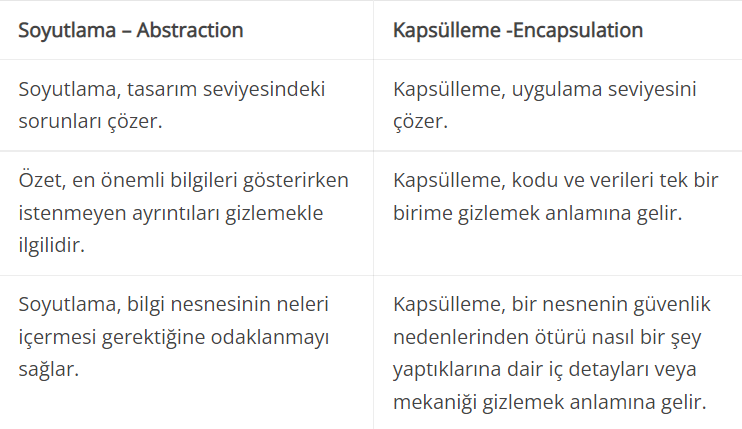

